In [235]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [236]:
data = pd.read_csv("weatherAUS.csv")

In [237]:
data.replace('Yes', 1, inplace=True)
data.replace('No', 0, inplace=True)
data.fillna(0, inplace=True)
data.drop(data.select_dtypes(['object']).columns, axis=1, inplace=True)
print(data)
scaler = StandardScaler()
data = scaler.fit_transform(data)
print (pd.DataFrame(data))

        MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0          13.4     22.9       0.6          0.0       0.0           44.0   
1           7.4     25.1       0.0          0.0       0.0           44.0   
2          12.9     25.7       0.0          0.0       0.0           46.0   
3           9.2     28.0       0.0          0.0       0.0           24.0   
4          17.5     32.3       1.0          0.0       0.0           41.0   
...         ...      ...       ...          ...       ...            ...   
145455      2.8     23.4       0.0          0.0       0.0           31.0   
145456      3.6     25.3       0.0          0.0       0.0           22.0   
145457      5.4     26.9       0.0          0.0       0.0           37.0   
145458      7.8     27.0       0.0          0.0       0.0           28.0   
145459     14.9      0.0       0.0          0.0       0.0            0.0   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0         

In [238]:
def EuclidianDistance(centroids, dp):
    ED = np.sqrt(np.sum((centroids - dp)**2, axis=1))
    return (ED)
import numpy as np
 
    

In [239]:
def Kmeans(data,k,max_iters):
    centroids = np.random.uniform(np.amin(data,axis=0),np.amax(data,axis=0),size=(k,data.shape[1]))
    print (centroids)
    for i in range (max_iters):
        y = []
        for dp in data:
            distance = EuclidianDistance(dp,centroids)
            k_num = np.argmin(distance)
            y.append(k_num)
        y = np.array(y)
        cluster_index = []
        for j in range(k):
            cluster_index.append(np.argwhere(y==j))
        cluster_centers = []
        for i,indices in enumerate(cluster_index):
            if len(indices) == 0:
                cluster_centers.append(centroids[i])
            else:
                cluster_centers.append(np.mean(data[indices],axis=0)[0])
        if np.max (centroids - np.array(cluster_centers))<0.0001:
            break
        else :
            centroids = np.array(cluster_centers)
    return y
        
        
        

C:\Users\Addy\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Addy\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Addy\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Addy\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\

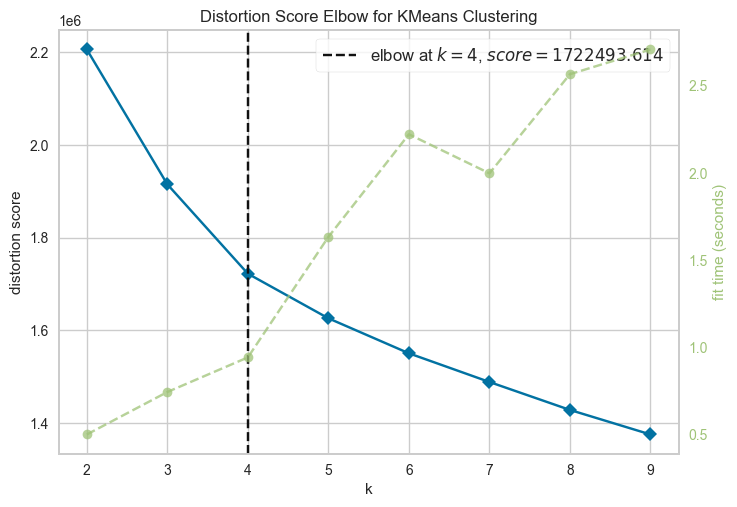

In [240]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2, 10))
visualizer.fit(data)  
visualizer.show()    
plt.show()



In [241]:
k = 4
max_iters = 1000

In [242]:
cluster_assignments = Kmeans(data, k, max_iters)

[[ 0.05860354 -2.93828224 10.2160498  30.86602574  0.29628265  2.99847687
   1.98954194  0.26253267 -0.20772101  1.18470276 -0.17907274 -2.66902433
  -0.56771466  0.20460764  0.35751696 -0.44153939  0.97838273  1.28032982]
 [ 3.13721667 -2.9579854  19.91234697 30.77595513 -0.83973837  4.97713336
   2.79070682  2.14389917  1.1689257   0.04543206 -2.22947315 -1.13722348
  -0.60817514  0.62606885  3.19084277 -1.93706167  0.18701546 -0.1659302 ]
 [-0.5430206   0.45064174 22.15066705  7.4535622  -0.77783583 -0.83510222
  10.40161006  0.40106431 -1.27944671  0.70595753 -2.1546395  -2.63713878
  -0.50426082  0.72002057 -1.99933771 -0.58182093  1.51482729  1.11131935]
 [-1.09613652  2.28191248 31.70431499 27.01474826 -0.28056577  0.96990153
  12.86851136 -1.79744832 -1.00899509  0.78291845 -2.26576712 -2.16410826
   1.76627156  0.95821567  0.77700421  0.4136145   1.86212215  0.72839992]]


[0 0 1 ... 0 0 0]


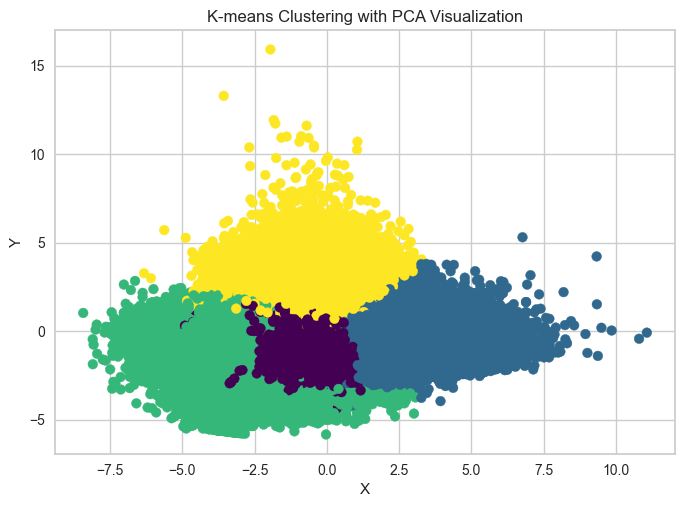

In [244]:
pca = PCA(n_components=8)
data_pca = pca.fit_transform(data)
print (cluster_assignments)
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=cluster_assignments, cmap='viridis')
plt.title('K-means Clustering with PCA Visualization')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()